# HW4-2 : Training GAN to generate pixel characters and items.
This homework consists of 4 tasks:
1. Implement Variational AutoEncoder (VAE) and its training
2. ***Implement Generative Adversarial Network (GAN) and its training***
3. ***Implement Conditonal Generative Adversarial Network (cGAN) and its training***
4.  ***Implement Fréchet inception distance (FID) score***

In this file, you are asked to perform ***Task 2,3,4*** and complete several functions and classes in `HW4_2_YourAnswer.py` and `HW4_fid_YourAnswer.py`.
In the notebook, the place where students are required to complete the codes will be denoted as Exercise or TODO

The score of this homework is mainly based on the 
- ***Whether generated image is plausible***(training is sucess or not) from your conditional GAN model which trained in Exercise 4
- ***FID score implementation*** in Exercise 5
- The ***generated image quality*** of your GAN model which trained in Exercise 6
    - It is evaluated by FID score with TA's implementation. 

Be careful that the selection of hyperparameters and model architecture will affect the performance of your model. 
Change your code in `HW4_2_YourAnswer.py` and hyperparmeters in the `config` variable to achieve better performance.

# Setting system path
## TODO
- Depending on your environment, select your proper code between `1 Setting on the colab` or `2. Setting on the local` Section. (You should comment out the other section)
    - Although you train your model on the local, please train your model on the colab in `Exercise 6`. The evaluation with TA's FID score might be not executable on the local.
- Set proper `path` variable to import `HW4_2_YourAnswer.py` and `HW4_fid_YourAnswer.py`

### 1. Setting on the colab
It allows to connect your google drive to colab and utilize files in your google drive 

Then, it changes the current directory to the path the howework folder is located.

### TODO
- Assign the path of your working directory (where the .ipynb file is located) to the variable named `path`.

In [ ]:
path = "MyDrive/Colab Notebooks/Intro_dl/hw4"  ######## YOUR WORKING DIRECTORY PATH HERE ########
def mount_drive():
    from google.colab import drive
    mount_location = '/content/drive'
    drive.mount(mount_location,force_remount=True)
    return mount_location
import os, sys
mount_location = mount_drive()
print("your google drive is mounted at: ", mount_location)
path = os.path.join(mount_location,path) # "/content/drive/MyDrive/"
if os.path.exists(path):
    print("Path exists\n", path)
    sys.path.append(path)
    print("Path added (file under this path automatically identified)\n", path)
    os.chdir(path)
else :
    raise ValueError("Path does not exist. Set proper path \n", path)

### 2. Setting on the local


In [1]:
path='./'
import os
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

## Import package and set serveral configs

In [30]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from HW4_2_YourAnswer import *
from HW4_fid_YourAnswer import calculate_fid
from utils import *
# It helps to reload the functions automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# Check device is 'cuda' if GPU is available
device = 'cpu' if not torch.cuda.is_available() else 'cuda'
device

'cpu'

## TODO
- You should set the `config` variable to achieve better performance.

In [32]:
from types import SimpleNamespace
# The config is used to store various hyperparameters
# Except for the ones mentioned below, you are free to add any hyperparameter you want
# Due to evaluate the performance of your model,
#   we will use the same diemension of the latent vector
config = SimpleNamespace(
    seed = 2023, # Do not change this
    input_shape = (3,16,16), # Do not change this
    num_classes = 5, # Do not change this
    nc = 3, # Do not change this
    test_batch_size = 64, # Do not change this
    latent_dim =100, # Do not change this
    ############################
    # you need to set the values below

    epoch = 20, # You can set under 20 epochs
    batch_size = 5,
    lr = 1e-5,
)
# usage : config.seed or config.batch_size, etc.

## TODO
- Write your student number here as a string

In [33]:
config.student_number = '2019-12172' 

In [34]:
# set randomness
set_randomness(config.seed)

# Generative Adversarial Network

GAN consists of two networks, ***Generator and Discriminator***, and you are asked to build these two networks.

Afterward, you are asked to define ***dataloader, loss function, optimizer***,  ***Fréchet inception distance (FID) score*** which is evaluation metric for GAN and ***its training procedure***.

To sum up, you need to implement the following things:
- Your own Generator model and Discriminator model for GAN
- Your own Generator model and Discriminator model for conditional GAN
- Dataloader
- Loss function
- Optimizer
- FID score
- Training procedure

# Exercise 1. Generator and discriminator model for GAN
In this initial exercise, the task is to construct two deep neural networks, both comprising a Generative Adversarial Network (GAN). Furthermore, you are asked to build the networks of conditional GAN (cGAN) in Exercise 2.

In this exercise, you are asked to implement the ***Generator*** and ***Discriminator*** model for GAN.

## 1.1 Generator in Generative Adversarial Network
First, let's implement generator. The generator for GAN is as below:
- Generator : $G(z) = x$
    - $z$ : Latent vector `(batch_size, latent_dim)`
    - $x$ : Fake image `(batch_size, 1, 16, 16)`

To do this, complete the implementation of the `Generator` class in `HW4_2_YourAnswer.py`.
You need to fill two blocks in the `Generator` class.
1. \_\_init\_\_ : Define model structure with `self.model`
2. forward : Implement forward pass of `Generator`


### 1.1.1 \_\_init\_\_
In the class initialization, you need to build ***your own*** generator model which outputs 3x16x16 images. The arguments are explained in the `HW4_2_YourAnswer.py`. 

Recommandation : Set the number of model parameters is less than 1.5M (Then, training time is less than 10~12 minutes). 

See the [link](https://pytorch.org/docs/stable/nn.html ) to find proper layer in the pytorch package.

### TODO
- Build your own generator model in the \_\_init\_\_ (The code in `HW4_2_YourAnswer.py`).

In [35]:
from HW4_2_YourAnswer import Generator
gen = Generator(latent_dim = config.latent_dim,nc = config.nc).to(device)
print(gen)

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=512, out_features=1024, bias=True)
    (7): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Linear(in_features=1024, out_features=768, bias=True)
    (10): Tanh()
  )
)


In [36]:
# check the number of parameters
print("The number of model parameters: ", sum(p.numel() for p in gen.parameters() if p.requires_grad))

The number of model parameters:  1473536


### 1.1.2 forward
The forward function take input of the batch of latent vector and return output of the batch of (fake) image.
### TODO
- Implement `forward` function in `Generator` class (The code in `HW4_2_YourAnswer.py`).

If implemented correctly, the output from the running the below cell is the `shape of image with batch (B,C,H,W)`

In [37]:
z = torch.randn(config.batch_size, config.latent_dim).to(device)
out = gen(z)
print(out.shape)
assert out.shape == (config.batch_size, config.nc, *config.input_shape[1:]), f"Wrong output shape from the generator (expected {(config.batch_size, config.nc, *config.input_shape[1:])}, got {out.shape})"

torch.Size([5, 3, 16, 16])



## 1.2 Discriminator in Generative Adversarial Network
First, let's implement discriminator. To do this, complete the implementation of the `Discriminator` class in `HW4_2_YourAnswer.py`.

Similarly, you need to fill two functions in the `Discriminator` class.
1. \_\_init\_\_ : Define model structure with `self.model`
2. forward : Implement forward pass of `Discriminator`

### 1.2.1 \_\_init\_\_
In the class initialization, you need to build ***your own*** discriminator model which returns the probability of being real. The arguments are explained in the `HW4_2_YourAnswer.py`.

Recommandation : Set the number of model parameters is less than 1.5M (Then, training time is less than 10~12 minutes).
 

See the [link](https://pytorch.org/docs/stable/nn.html ) to find proper layer in the pytorch package.

### TODO
- Build the discriminator model in the \_\_init\_\_ (The code in `HW4_2_YourAnswer.py`).

In [38]:
from HW4_2_YourAnswer import Discriminator
dis = Discriminator(nc=config.nc).to(device)
print(dis)

Discriminator(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=4096, out_features=1, bias=True)
    (10): Sigmoid()
  )
)


In [39]:
# check the number of parameters
print("The number of model parameters: ",  sum(p.numel() for p in dis.parameters() if p.requires_grad))

The number of model parameters:  660865


### 1.2.2 forward
The forward function take input of the batch of image and return output of the probability of being real for each batch.
### TODO
- Implement `forward` function in `Discriminator` class (The code in `HW4_2_YourAnswer.py`).

If the function is correctly implemented, the output of the below cell would be `the probability of being real` with size of (B,1)

In [40]:
z = torch.randn(config.batch_size, config.latent_dim).to(device)
out = gen(z)
out1 = dis(out)
print(out1.shape)
assert (out1.shape == torch.Size([config.batch_size, 1])), f"Discriminator output shape is wrong : {out1.shape}"

torch.Size([5, 1])


## Exercise 2. Conditional GAN (cGAN)
In this exercise, you are asked to implement conditional GAN (cGAN). The cGAN is similar to GAN, but it takes label as input with latent vector. The implementation sequence is as below:
- Implement `cGenerator` for cGAN
- Implement `cDiscriminator` for cGAN

### 2.1 Generator in cGAN
Similar to GAN, you need to implement generator for cGAN. The generator for cGAN is as below:
- Generator : $G(z,y) = x$
    - $z$ : Latent vector `(batch_size, latent_dim)`
    - $y$ : Label vector `(batch_size, num_classes)`
    - $x$ : Fake image `(batch_size, 1, 16, 16)`

To build your own model, complete the implementation of the `cGenerator` class in `HW4_2_YourAnswer.py`.
You need to fill two blocks in the `cGenerator` class.
1. \_\_init\_\_ : Define model structure with `self.model`
2. forward : Implement forward pass of `cGenerator`


### 2.1.1 \_\_init\_\_
In the class initialization, you need to build the conditinal generator model with your own code. It takes input of latent vector and label and returns the fake image (size : 3x16x16). The arguments are explained in the `HW4_2_YourAnswer.py`.

See the [link](https://pytorch.org/docs/stable/nn.html ) to find proper layer in the pytorch package.

In [41]:
from HW4_2_YourAnswer import *
cond_gen = cGenerator(input_shape= config.input_shape,
                 latent_dim=config.latent_dim, num_classes=config.num_classes, nc = config.nc
                ).to(device)
print(cond_gen)

cGenerator(
  (label_embedding): Embedding(5, 100)
  (model): Sequential(
    (0): Linear(in_features=600, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=512, out_features=1024, bias=True)
    (7): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Linear(in_features=1024, out_features=768, bias=True)
    (10): Tanh()
  )
)


In [42]:
# check the number of parameters
print("The number of model parameters: ",  sum(p.numel() for p in cond_gen.parameters() if p.requires_grad))

The number of model parameters:  1602036


### 2.1.2 forward
The forward function take input of the batch of latent vector and return output of the batch of (fake) image.
### TODO
- Implement `forward` function in `cGenerator` class (The code in `HW4_2_YourAnswer.py`).

If implemented correctly, the output from the running the below cell is the `shape of image with batch (B,C,H,W)`

In [43]:
z = torch.randn(config.batch_size, config.latent_dim).to(device)
label = torch.zeros(config.batch_size, config.num_classes).scatter_(1, torch.randint(0, config.num_classes, (config.batch_size,1)), 1).to(device)
out = cond_gen(z, label)
print(out.shape)
assert out.shape == (config.batch_size, config.nc, *config.input_shape[1:]), "Wrong output shape from the conditional generator"

torch.Size([5, 3, 16, 16])



## 2.2 Discriminator in Conditional Generative Adversarial Network
First, let's implement discriminator. To do this, complete the implementation of the `cDiscriminator` class in `HW4_2_YourAnswer.py`.
Similarly, you need to fill two functions in the `cDiscriminator` class.
1. \_\_init\_\_ : Define model structure with ` self.model`
2. forward : Implement forward pass of `cDiscriminator`


### 2.2.1 \_\_init\_\_
Build your own model for `cDiscriminator`. The arguments are explained in the `HW4_2_YourAnswer.py`.

See the [link](https://pytorch.org/docs/stable/nn.html ) to find proper layer in the pytorch package.

### TODO
- Build the discriminator model in the cDiscriminator class (The code in `HW4_2_YourAnswer.py`).

In [44]:
from HW4_2_YourAnswer import cDiscriminator
cond_dis = cDiscriminator(input_shape = config.input_shape,num_classes=config.num_classes).to(device)
print(cond_dis)

cDiscriminator(
  (label_embedding): Embedding(5, 768)
  (model): Sequential(
    (0): Linear(in_features=4608, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Linear(in_features=256, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [45]:
# check the number of parameters
print("The number of model parameters: ", sum(p.numel() for p in cond_dis.parameters() if p.requires_grad))

The number of model parameters:  5379841


### 2.2.2 forward
The forward function take input of the batch of ***image and label***, then return output of the probability of being real for each batch. 
### TODO
- Implement `forward` function in `cDiscriminator` class (The code in `HW4_2_YourAnswer.py`).

If implemented correctly, the output from the running the below cell is the `the probability of being real with batch (B,1)`

In [46]:
z = torch.randn(config.batch_size, config.latent_dim).to(device)
label = torch.zeros(config.batch_size, config.num_classes).scatter_(1, torch.randint(0, config.num_classes, (config.batch_size,1)), 1).to(device)
out = cond_gen(z,label)
out1 = cond_dis(out,label)
print(out1.shape)
assert (out1.shape == torch.Size([config.batch_size, 1])), f"Discriminator output shape is wrong : {out1.shape}"

torch.Size([5, 1])


# Exercise 3 : Implement dataloader for training procedure for GAN
To implement dataloader, you need to define `preprocessing` and `dataloader` for dataset. The implementation sequence is as below:
1. implement `preprocessing` via `torchvision.transforms`
    - The `preprocessing` consists some transformation or processsing before loading on the network, such as normalization, resize, or other data augmentation.
2. Declare `dataset` with `torch.utils.data.Dataset`
3. Create `dataloader` which directly feeds the image into GAN networks.
    - It defines batch size, shuffling option, or etc.



### 3.1 Preprocessing the dataset
In this exercise, we implement the transformation function via `torchvision.transforms`.
***Define your own*** preprocessing function for the input via `torchvision.transforms`.
    
For more details, see the [link](https://pytorch.org/vision/0.9/transforms.html).

### TODO
- Implement transformation (preprocessing) for the input image in `dataloader` class (The code in `HW4_2_YourAnswer.py`).
    - Please include transformation of `ToTensor` in the transformation since the model takes the input of torch tensor image.


In [47]:
from HW4_2_YourAnswer import *
loader_for_test = dataloader(train=False, batch_size=config.batch_size)
print(loader_for_test.transform)

Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)


### 3.2 Implement dataset and dataloader
In this practice, you are asked to implement dataset and dataloader.
### TODO
- Implement self.dataset to load sprite dataset using `torch.utils.data.TensorDataset`. (The code in `HW4_2_YourAnswer.py`)
- Implement self.dataloader (The code in `HW4_2_YourAnswer.py`)

If you implemented correctly, the output will be as below (Any transformation is allowed, but the shape of image should be `(3,16,16)` and the type of label should be `torch.Tensor`):

```
The shape of image from the dataloader : torch.Size([10, 3, 16, 16])
The type of image from the dataloader : <class 'torch.Tensor'>
The shape of label from the dataloader : torch.Size([10, 5])
```

In [48]:
from HW4_2_YourAnswer import *
loader_for_test = dataloader(train=True, batch_size=10)
for img, label in loader_for_test:
    print(f"The shape of image from the dataloader : {img.shape}")
    print(f"The type of image from the dataloader : {type(img)}")
    print(f"The shape of label from the dataloader : {label.shape}")
    break

The shape of image from the dataloader : torch.Size([10, 3, 16, 16])
The type of image from the dataloader : <class 'torch.Tensor'>
The shape of label from the dataloader : torch.Size([10, 5])


If implemented correctly, the figure is presented with character or item images with label as below.


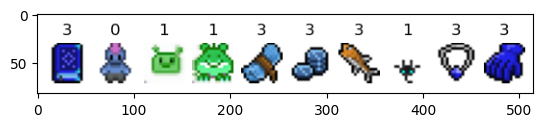

In [49]:
import cv2
sample_img = cv2.imread("./test_file/sprites_img.png")
plt.imshow(sample_img)

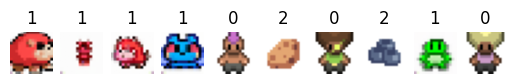

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
img = img.numpy().transpose(0,2,3,1)
label = torch.argmax(label,dim=1).numpy().squeeze()
for i in range(10):
  train_x = img[i]
  train_y = label[i]

  ax = fig.add_subplot(1, 10, i+1)
  ax.imshow(train_x)
  ax.set_title(str(train_y))
  ax.axis("off")

plt.show()

## Exercise 4. Implement training procedure for GAN and cGAN
In this exercise, you are asked to implement training procedure for GAN. To train, you need to implement training code, optimimzer and loss function for generator and discriminator. The implementation sequence is as below:
- Implement `loss_function` for generator and discriminator
- Implement `optimizer` for each network
- Implement `training process` of GAN
- Implement `training process` of cGAN
- Implement `Fréchet inception distance (FID)` score

The training process involves a back-and-forth competition between the generator and the discriminator, with each iteration refining both models until the generator produces high-quality, realistic data.

### 4.1 Loss function
To train GAN, you need to define loss function for generator and discriminator. 
The discriminator and the generator engage in a two-player minimax game with the value function $V(G,D)$ where each player has opposing objective.

$min_G max_D V(D,G) = \mathbb{E}_{x\sim p_{data}(x)}[logD(x)] + \mathbb{E}_{z\sim p_z(z)}[log(1-D(G(z)))]$

The loss function outputs the loss value for each network. It returns the loss value depending on the real image and the fake image.

***Keep in mind***  that adding a small value to avoid an error when calculating the log.

### TODO
- Implement `loss_function` function for generator and discriminator (The code in `HW4_2_YourAnswer.py`). Depending on the implementation, the output of the loss function could be different, but the shape of the output should be `torch.Size([batch_size,1])`.

### 4.2 Optimizer
To train GAN, you need to define optimizer for generator and discriminator. The optimizer for generator and discriminator is as below:
- Generator optimizer : Adam optimizer with learning rate `config.lr` and betas (0.5, 0.999)
- Discriminator optimizer : Adam optimizer with learning rate `config.lr` and betas (0.5, 0.999)


### TODO
- Implement `optimizer` for generator and discriminator in the training_GAN class (The code in `HW4_2_YourAnswer.py`)
    - Define your optimimizer which is in `torch.optim`

In [51]:
trainer_test = training_GAN(train_loader = None, \
                                generator = gen, discriminator = dis, \
                                device=device, config = config)
print("===== Optimizer for the generator =====")
print(trainer_test.optimizer_G)
print("===== Optimizer for the discriminator =====")
print(trainer_test.optimizer_D)

===== Optimizer for the generator =====
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.5, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 1e-05
    maximize: False
    weight_decay: 0
)
===== Optimizer for the discriminator =====
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.5, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 1e-05
    maximize: False
    weight_decay: 0
)


### 4.3 Training process for GAN
To train GAN, you need to implement training process for generator and discriminator. The things you should implemented for generator and discriminator are as below:
- Discriminator training :
    - Generate random latent vector
    - Feed the latent vector into generator and get fake image `with no gradient`
    - Feed the fake image into discriminator and get discriminator output
    - Feed the real image into discriminator and get discriminator output
    - Calculate discriminator loss with two discriminator outputs
    - Update discriminator with discriminator loss
- Generator training :
    - Generate random latent vector
    - Feed the latent vector into generator and get fake image
    - Feed the fake image into discriminator and get discriminator output
    - Calculate generator loss with discriminator output
    - Update generator with generator loss

### TODO
- Implement `one_iter_train` for generator and discriminator in the training_GAN class (The code in `HW4_2_YourAnswer.py`)
    - Use `self.generator` and `self.discriminator` to access generator and discriminator
    - Use `loss_function` to calculate loss
    - Use `self.optimizer_G` and `self.optimizer_D` to update generator and discriminator

The provided code below serves as a test for the training process based on the preceding instructions. After reviewing the output of the cell, modifications is allowed if you think it is necessary to enhance the training.
You don't need to exactly follow the instructions   If `one_iter_train` is implemented correctly, the output of the below cell will be as below:
```
your implementation outcome is
 {'loss_G': 6.181875705718994, 'loss_D': 0.6788209676742554}
```

In [52]:
from HW4_2_YourAnswer import *
from utils import test_one_iter_train_GAN
from copy import deepcopy
test_config = deepcopy(config)
test_config.batch_size =2
test_config.lr = 2e-4

results = test_one_iter_train_GAN(training_GAN,test_config,device)

print("your implementation outcome is\n",results)

ModuleNotFoundError: No module named 'test_GAN_one_iter'

### Let' train GAN with your implementation
Let's start training GAN. However, it is not guaranteed to train well since it is very sensitive to the hyperparameter.

In this practice, you are asked to train GAN with your implementation.
***Please check your generator generates the plausible image.*** If not, try to change the hyperparameter or model architecture. 

***Don't waste your time in training better generator in this exercise***. Just check that it is trained well and move on to the next exercise. The later exercise (Exercise 6) will ask you to train your model with your implementation. Then, evaluate the performance of your model.

`train` function in `training_GAN` class will train the GAN model with your implementation. The `train` function will return the trained generator and discriminator model even though the interrupt occurs during the training process.

The epoch in the `test_config` is set to 10, but you can train more than 10 epochs if needed (but, 10 epochs might be enough to check whether the generator is well trained).


In [ ]:
from HW4_2_YourAnswer import *
from copy import deepcopy
test_config = deepcopy(config)
test_config.epoch = 10

train_loader = dataloader(train=True, batch_size=test_config.batch_size)

generator = Generator(latent_dim = test_config.latent_dim,nc = test_config.nc).to(device)
discriminator = Discriminator(nc=test_config.nc).to(device)



trainer_test = training_GAN(train_loader, \
                                generator = generator, discriminator = discriminator, \
                                device=device, config = test_config, fid_score_on=False,
                                save_model=False,img_show=True,evaluation_on=True)
results = trainer_test.train()
trained_generator = results['generator']

## Visualization of the training result
If you implement the `training_GAN` class correctly, you can get the following result:
- The loss curve of the GAN
- Visualization of the output image created by the generator

In [ ]:
# load the trained model and loss history
trained_generator = results['generator']
trained_discriminator = results['discriminator']
loss_G = results['G_loss_history']
loss_D = results['D_loss_history']

### Loss curve of GAN
With the following code, you can visualize the loss curve of the GAN. The generator and discriminator loss are plotted in the same figure. 

In [ ]:
plt.plot(loss_G, label='loss_G')
plt.plot(loss_D, label='loss_D')
plt.legend()

### Visualization of the output image
If you implement the `training_GAN` class correctly, you can see the visualization of the output image like below.

In [ ]:
from utils import visualizeGAN
visualizeGAN()

### Visualization of the generated image
- The below output is the result of the GAN training with your implementation.

In [ ]:
# fake image generation
show_image_with_GAN(trained_generator,config,device=device,cols=10,rows=10)

### 4.4 Training process for conditional GAN
To train conditional GAN, you need to implement training process for conditional generator and discriminator. The things you should implemented for generator and discriminator are as below:
- Discriminator training :
    - Generate random latent vector
    - Feed the latent vector and ***label*** into generator and get fake image `with no gradient`
    - Feed the fake image into discriminator and get discriminator output
    - Feed the real image into discriminator and get discriminator output
    - Calculate discriminator loss with two discriminator outputs
    - Update discriminator with discriminator loss
- Generator training :
    - Generate random latent vector
    - Feed the latent vector and ***label*** into generator and get fake image
    - Feed the fake image into discriminator and get discriminator output
    - Calculate generator loss with discriminator output
    - Update generator with generator loss

In [ ]:
from HW4_2_YourAnswer import *
from copy import deepcopy
test_config = deepcopy(config)
test_config.batch_size =2
images = torch.load('./test_file/test_images.pth',map_location=device)
labels = torch.load('./test_file/test_labels.pth',map_location=device)

generator = cGenerator(input_shape= config.input_shape,
                 latent_dim=config.latent_dim,num_classes=config.num_classes, nc = config.nc
                ).to(device)
discriminator = cDiscriminator(input_shape = config.input_shape,num_classes=config.num_classes).to(device)

trainer = training_cGAN(train_loader = None, \
                            generator = generator, discriminator = discriminator, \
                            device=device, config = test_config)

results = trainer.one_iter_train(images,labels)

print("your implementation outcome is\n",results)


### Let' train conditional GAN with your implementation
Let's start training conditional GAN like GAN. However, it is not guaranteed to train well since it is very sensitive to the hyperparameter.

In this practice, try to train conditional GAN with your implementation.
***Please check your generator generates the plausible image.*** If not, try to change the hyperparameter or model architecture. 

Unlike training GAN which measures the quality of the generated image with FID score evaluted in Exercise 6, training conditional GAN will be evaluated whether the generated image is plausible or not (success or not). 

The epoch in the `test_config` is set to 10, but you can train more than 10 epochs and less than 20 epochs if needed (but, 10 epochs might be enough to check whether the generator is well trained).


In [ ]:
from HW4_2_YourAnswer import *
import copy
test_config = copy.deepcopy(config)
train_loader = dataloader(train=True, batch_size=test_config.batch_size)

generator =  cGenerator(input_shape= test_config.input_shape,
                 latent_dim=test_config.latent_dim,num_classes=test_config.num_classes, nc = test_config.nc
                ).to(device)
discriminator = cDiscriminator(input_shape = test_config.input_shape,\
                               num_classes=test_config.num_classes).to(device)

trainer_test = training_cGAN(train_loader, \
                                generator = generator, discriminator = discriminator, \
                                device=device, config = test_config, fid_score_on=False,
                                save_model=True,img_show=True,evaluation_on=True)
results = trainer_test.train()
trained_generator = results['generator']

In [ ]:
# load the trained model and loss history
trained_generator = results['generator']
trained_discriminator = results['discriminator']
loss_G = results['G_loss_history']
loss_D = results['D_loss_history']

### Loss curve of condtional GAN
With the following code, you can visualize the loss curve of the condtional GAN. The generator and discriminator loss are plotted in the same figure. 

In [ ]:
plt.plot(loss_G, label='loss_G')
plt.plot(loss_D, label='loss_D')
plt.legend()

### Visualization of the generated image
- The below output is the result of the condtional GAN training with your implementation. The output image is generated with the random latent vector and label.

In [ ]:
# fake image generation with your generator 
# it produces image depending on the label
show_image_with_label(trained_generator,test_config,device=device,cols=6,rows=6)

## Exercise 5. Fréchet inception distance (FID) score
As you see, the training process of GAN is not stable and loss is not a good indicator for the performance of GAN. To evaluate the performance of GAN, the Fréchet inception distance is suggested. You need to implement it here. The FID score is as below:
- FID score : $FID = ||\mu_{r} - \mu_{g}||^{2}_{2} + Tr(\Sigma_{r} + \Sigma_{g} - 2(\Sigma_{r}\Sigma_{g})^{1/2})$
    - $\mu_{r}$ : Mean of real image's feature `(2048,)`
    - $\mu_{g}$ : Mean of fake image's feature `(2048,)`
    - $\Sigma_{r}$ : Covariance of real image's feature `(batch_size, batch_size)`
    - $\Sigma_{g}$ : Covariance of fake image's feature `(batch_size, batch_size)`
    - All features are extracted from the pretrained  Inception-v3 network. In our code, which is defined in `PartialInceptionNetwork` class. `(batch_size, 2048)`
    
In this exercise, you are asked to implement FID score. The `calculate_fid_score` function is already implemented, but the function called in the function is not implemented. You need to implement the following functions to work `calculate_fid_score` function:
- `get_statistics` : Calculate mean and covariance of the extracted feature
- `get_activation` : It is called in the `get_statistics` function. It extracts feature from the pretrained Inception-v3 network
- `calculate_frechet_distance` : Calculate FID score with mean and covariance of the extracted feature


How `calculate_fid` function works
- preprocessing the images with `preprocess_images` function (already implemented)
- The `get_activation` function extract features from the `real_images` and `fake_images` via `get_activations` function
- The `get_statistics` function calculate mean and covariance of features extracted from `get_activations` function
- The `calculate_frechet_distance` function calculate FID score with the mean and covariance of features
- The `calculate_fid` function return FID score

### TODO
- Implement `get_activations` function to extract features from the pretrained Inception-v3 network (`inception_network` in the code) (The code in `HW4_fid_YourAnswer.py`).
- Implement `get_statistics` to calculate mean and covariance of features (The code in `HW4_fid_YourAnswer.py`).
- Implement `calculate_frechet_distance` and  to calculate FID score (The code in `HW4_fid_YourAnswer.py`).

Each function checks output shape (except calculate_frechet_distance) whether the function is well implemented.

Below the cell, we are going to check `calculate_frechet_distance` function

If implemented correctly, the fid_1 is much larger than fid_2 (The fid_1 is about 300 ~ 400 and fid_2 is about 20~70). The batch size passed to the `calculate_fid_score` cannot be larget than the batch size of image passed to the function (In this case, the batch size of image is 1).

Another way to check the implementation is set `fid_score_on=True` in `training_GAN` or `training_cGAN` class. If the implementation is correct, the fid score will be printed during the training process. Furthermore, the fid score becomes lower as the training process proceeds if you find the proper hyperparameter. 

In [ ]:
from utils import get_MNIST_image_and_visualize
image1, image2, image3 = get_MNIST_image_and_visualize()

In [ ]:
# Calculate FID score
from HW4_fid_YourAnswer import calculate_fid, PartialInceptionNetwork
import cv2
inception_net = PartialInceptionNetwork()
fid_1 = calculate_fid(inception_net,image1, image2,batch_size=1,device=device)
fid_2 = calculate_fid(inception_net,image2, image3,batch_size=1,device=device)
print(f"fid_1 : {fid_1:.4f} >> fid_2 : {fid_2:.4f}")

## Exercise 6. Let'train and try to obtain good performance of GAN
Let's start training with implemented training process. However, it might fails to converge since it is very sensitive to the hyperparameter. Therefore, try to tune the hyperparameter in the `config` class and model architecture to achieve better performance.
### Training_GAN parameter options
- `fid_score_on`
    - If you does not implement `FID` score yet, set argument `fid_score_on=False` in the `training_GAN` function. However, it is recommended to implement `FID` score to evaluate the performance of GAN.
- `img_show`
    - If you want to see the generated for each epoch, set `img_show=True`.  The `img_show` argument is to show the generated image during training. 

### You will be evaluated with the FID score which calculated in the last epoch. The evaluation results will be as below:
```
EPOCH {config.epochs} - FID score : xxx.xxxx (evaluation)
```
After training, check the `GAN_generated_img.gif` in your `path`. You can see the generated image as epoch changes.
When submitting the homework, please submit the `GAN_model.pth` file which generated in your `path`.

In [ ]:
from HW4_2_YourAnswer import *

train_loader = dataloader(train=True, batch_size=config.batch_size)

generator = Generator(latent_dim = config.latent_dim, nc = config.nc).to(device)
discriminator = Discriminator(nc=config.nc).to(device)



trainer_test = training_GAN(train_loader, \
                                generator = generator, discriminator = discriminator, \
                                device=device, config = config, fid_score_on=False,
                                save_model=True,img_show=True,evaluation_on=True)
results = trainer_test.train()


In [ ]:
# load the trained model and loss history
trained_generator = results['generator']
trained_discriminator = results['discriminator']
loss_G = results['G_loss_history']
loss_D = results['D_loss_history']

### Loss curve of GAN
With the following code, you can visualize the loss curve of the GAN. The generator and discriminator loss are plotted in the same figure. 

In [ ]:
plt.plot(loss_G, label='loss_G')
plt.plot(loss_D, label='loss_D')
plt.legend()

### Visualization of the generated image
- The below output is the result of the GAN training with your implementation.

In [ ]:
# fake image generation
show_image_with_GAN(trained_generator,config,device=device,cols=10,rows=10)

## Acknowledgments
- Dataset : Sprites by ElvGames, [FrootsnVeggies](https://zrghr.itch.io/froots-and-veggies-culinary-pixels) and [kyrise](https://kyrise.itch.io/)